# Run Any Kind of Logistic Regression (Binomial, Multinomial, etc.)

### Authors: Calvin Howard.

#### Last updated: March 16, 2024

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Directory

In [118]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_archetypes/train_cth'

Import Data

In [155]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/cortical_thickness/differential_diagnoses_train_CT_jan13.csv'
sheet = None

In [156]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,DX,subid,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,AD,002_S_5018,0.792234,0.637130,0.770520,0.711657,0.741938,0.741759,0.751960,0.778796,0.977918
1,AD,003_S_4136,0.698004,0.541441,0.697240,0.664413,0.627885,0.639614,0.655714,0.681190,0.031744
2,AD,003_S_4152,0.710199,0.464189,0.721739,0.734623,0.733545,0.686729,0.699635,0.698206,1.282207
3,AD,003_S_4373,0.742413,0.586996,0.689886,0.646002,0.718025,0.714775,0.692431,0.712252,0.859213
4,AD,003_S_4892,0.787148,0.624036,0.770895,0.713148,0.747336,0.754323,0.751406,0.788459,1.177357
...,...,...,...,...,...,...,...,...,...,...,...
472,CN,130_S_4343,0.820439,0.612870,0.817282,0.770483,0.803333,0.810117,0.813656,0.835698,1.139855
473,CN,135_S_4566,0.801270,0.604334,0.753413,0.697122,0.760507,0.799688,0.779230,0.786925,1.219154
474,CN,137_S_4520,0.828650,0.600227,0.836563,0.776609,0.810572,0.835810,0.830756,0.857019,1.055402
475,CN,137_S_4632,0.820463,0.619128,0.834255,0.801400,0.808762,0.823134,0.830933,0.845885,1.071962


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [157]:
drop_list = ['DX']

In [158]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,DX,subid,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,AD,002_S_5018,0.792234,0.637130,0.770520,0.711657,0.741938,0.741759,0.751960,0.778796,0.977918
1,AD,003_S_4136,0.698004,0.541441,0.697240,0.664413,0.627885,0.639614,0.655714,0.681190,0.031744
2,AD,003_S_4152,0.710199,0.464189,0.721739,0.734623,0.733545,0.686729,0.699635,0.698206,1.282207
3,AD,003_S_4373,0.742413,0.586996,0.689886,0.646002,0.718025,0.714775,0.692431,0.712252,0.859213
4,AD,003_S_4892,0.787148,0.624036,0.770895,0.713148,0.747336,0.754323,0.751406,0.788459,1.177357
...,...,...,...,...,...,...,...,...,...,...,...
472,CN,130_S_4343,0.820439,0.612870,0.817282,0.770483,0.803333,0.810117,0.813656,0.835698,1.139855
473,CN,135_S_4566,0.801270,0.604334,0.753413,0.697122,0.760507,0.799688,0.779230,0.786925,1.219154
474,CN,137_S_4520,0.828650,0.600227,0.836563,0.776609,0.810572,0.835810,0.830756,0.857019,1.055402
475,CN,137_S_4632,0.820463,0.619128,0.834255,0.801400,0.808762,0.823134,0.830933,0.845885,1.071962


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [159]:
data_df.columns

Index(['DX', 'subid', 'AD', 'SV', 'LBD', 'BV', 'PNFA', 'CBS', 'PSP', 'CN',
       'Peak_Values'],
      dtype='object')

Set the parameters for dropping rows

In [160]:
# column = 'Cohort'  # The column you'd like to evaluate
# condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
# value = 0 # The value to drop if found

In [161]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [162]:
# Remove anything you don't want to standardize
# cols_not_to_standardize = ['DX', 'SUBID'] # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']


In [163]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
# data_df

# 00 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
**Normal Logistic**
- Assesses the impact of multiple predictors on an outcome.
- formula = 'Binary Outcome ~ Predictor1 + Predictor2'

**Multiple Logistic**
- Assesses the impact of predictor on an outcome.
- formula = 'Ordinal Outcome ~ Predictor1 + Predictor2'

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [164]:
data_df.columns

Index(['DX', 'subid', 'AD', 'SV', 'LBD', 'BV', 'PNFA', 'CBS', 'PSP', 'CN',
       'Peak_Values'],
      dtype='object')

In [165]:
formula = "DX ~ AD + SV + LBD + BV + PNFA + CBS + PSP + CN"

# 02 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [166]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df, add_intercept=False)
design_matrix

,AD,SV,LBD,BV,PNFA,CBS,PSP,CN
0,0.792234,0.637130,0.770520,0.711657,0.741938,0.741759,0.751960,0.778796
1,0.698004,0.541441,0.697240,0.664413,0.627885,0.639614,0.655714,0.681190
2,0.710199,0.464189,0.721739,0.734623,0.733545,0.686729,0.699635,0.698206
3,0.742413,0.586996,0.689886,0.646002,0.718025,0.714775,0.692431,0.712252
4,0.787148,0.624036,0.770895,0.713148,0.747336,0.754323,0.751406,0.788459
...,...,...,...,...,...,...,...,...
472,0.820439,0.612870,0.817282,0.770483,0.803333,0.810117,0.813656,0.835698
473,0.801270,0.604334,0.753413,0.697122,0.760507,0.799688,0.779230,0.786925
474,0.828650,0.600227,0.836563,0.776609,0.810572,0.835810,0.830756,0.857019
475,0.820463,0.619128,0.834255,0.801400,0.808762,0.823134,0.830933,0.845885


Check multicollinearity in design matrix

In [167]:
#Multico. Check
from calvin_utils.statistical_utils.statistical_measurements import calculate_vif
calculate_vif(design_matrix)

,features,VIF
0,AD,3777.566376
1,SV,155.518703
2,LBD,7271.510070
3,BV,1873.457247
4,PNFA,3726.821407
5,CBS,15209.136788
6,PSP,17606.890279
7,CN,9960.666875


# 03 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [168]:
# outcome_matrix = outcome_matrix.iloc[:, [0]]
outcome_matrix

,DX[AD],DX[BV],DX[CBS],DX[CN],DX[LBD],DX[PNFA],DX[PSP],DX[SV]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
472,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
474,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
475,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**CRITICAL IN MULTINOMIAL LOGISTIC REGRESSION**
- A multinomial logistic reg. will set results RELATIVE TO A REFERENCE class. 
- The reference class is the first classification the multinomial encounters.
- **Especially if you are running a multinomial logistic regression, set your reference class below**

In [169]:
reference = 'Diagnosis[Control]'

# 04 - Run the Regression

Regression Results Are Displayed Below

- This will run a binomial or a multinomial logit dependig on your outcome matrix. 
- A multinomial logit will display N-1 categories, where N is the number of potential classifications you have. This occurs because everything is set in reference to that class. 
- So, the reference will either be the first column in your outcomes_matrix, or you can manually set it first.

In [170]:
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
logreg = LogisticRegression(outcome_matrix, design_matrix)
results = logreg.run()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.786066
         Iterations 12
----INTERPRETATION KEY----
reference_category : DX[AD]
y=0 : DX[BV]
y=1 : DX[CBS]
y=2 : DX[CN]
y=3 : DX[LBD]
y=4 : DX[PNFA]
y=5 : DX[PSP]
y=6 : DX[SV]
<bound method MultinomialResults.summary2 of <statsmodels.discrete.discrete_model.MultinomialResults object at 0x2a8b66390>>


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: MNLogit
==================================================================
Model:              MNLogit          Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.563      
Date:               2025-03-12 12:10 AIC:              861.9071   
No. Observations:   477              BIC:              1095.2880  
Df Model:           49               Log-Likelihood:   -374.95    
Df Residuals:       421              LL-Null:          -858.70    
Converged:          1.0000           LLR p-value:      8.3310e-171
No. Iterations:     12.0000          Scale:            1.0000     
-----------------------------------------------------------------
 y = 0    Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
-----------------------------------------------------------------
  AD     -79.5737   27.1638  -2.9294  0.0034  -132.8137  -26.3336
  SV       8.8138    8.1881   1.0764  0.2817    -7.2346   24.8621
 LBD     -66.0894   37.6675  -1.7545  0.0793  -139.9164    7.7376
  BV      40.8499   19.7201   2.0715  0.0383     2.1993   79.5005
PNFA      17.6379   22.9397   0.7689  0.4420   -27.3232   62.5989
 CBS      -9.1289   47.0929  -0.1938  0.8463  -101.4293   83.1715
 PSP      64.5360   49.2044   1.3116  0.1897   -31.9028  160.9748
  CN      25.0970   40.0074   0.6273  0.5305   -53.3160  103.5100
-----------------------------------------------------------------
y = 1    Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
-----------------------------------------------------------------
  AD   -193.2686   29.9262  -6.4582  0.0000  -251.9229  -134.6144
  SV     10.7727    9.2947   1.1590  0.2465    -7.4446    28.9901
 LBD    -24.4164   36.3800  -0.6711  0.5021   -95.7199    46.8871
  BV    -84.0893   22.7276  -3.6999  0.0002  -128.6346   -39.5439
PNFA     33.2201   26.7109   1.2437  0.2136   -19.1323    85.5726
 CBS     -7.0681   46.5262  -0.1519  0.8793   -98.2578    84.1216
 PSP    155.2234   49.9339   3.1086  0.0019    57.3548   253.0921
  CN    105.1038   40.5950   2.5891  0.0096    25.5391   184.6686
-----------------------------------------------------------------
y = 2    Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
-----------------------------------------------------------------
  AD   -153.0284   20.9701  -7.2975  0.0000  -194.1290  -111.9279
  SV      2.6581    6.0129   0.4421  0.6584    -9.1270    14.4432
 LBD    -28.7675   23.3833  -1.2303  0.2186   -74.5979    17.0629
  BV    -40.9129   14.0774  -2.9063  0.0037   -68.5041   -13.3217
PNFA     16.6815   18.1614   0.9185  0.3584   -18.9142    52.2771
 CBS      0.8564   31.9558   0.0268  0.9786   -61.7759    63.4886
 PSP     14.8541   33.6834   0.4410  0.6592   -51.1641    80.8724
  CN    185.2140   29.5279   6.2725  0.0000   127.3403   243.0877
-----------------------------------------------------------------
y = 3     Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
-----------------------------------------------------------------
  AD    -157.2564   34.3064  -4.5839  0.0000  -224.4957  -90.0171
  SV       8.8324   10.2806   0.8591  0.3903   -11.3172   28.9821
 LBD     256.1204   47.8477   5.3528  0.0000   162.3407  349.9001
  BV     -76.8796   24.4171  -3.1486  0.0016  -124.7363  -29.0229
PNFA      -8.7995   28.8245  -0.3053  0.7602   -65.2945   47.6955
 CBS      52.3686   54.8039   0.9556  0.3393   -55.0452  159.7823
 PSP      61.5564   56.9933   1.0801  0.2801   -50.1485  173.2613
  CN    -137.5210   51.4418  -2.6733  0.0075  -238.3451  -36.6969
-----------------------------------------------------------------
y = 4    Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
-----------------------------------------------------------------
  AD   -171.5761   32.6704  -5.2517  0.0000  -235.6089  -107.5433
  SV     22.5675    8.7587   2.5766  0.0100     5.4007    39.7342
 LBD    -36.0595   39.0528  -0.9234  0.3558  -112.6016    40.4826
  BV  

# 6 - Receiver Operating Characteristic
- The ROC considers clasisfications acoss ALL POSSIBLE PROBABILITIES, demonstrating what is ultiamtely accomplishable at the best possible threshold

- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

Taking maximum probability as prediction.
There are 112.0 observations for DX[AD]
There are 45.0 observations for DX[BV]
There are 31.0 observations for DX[CBS]
There are 170.0 observations for DX[CN]
There are 30.0 observations for DX[LBD]
There are 28.0 observations for DX[PNFA]
There are 32.0 observations for DX[PSP]
There are 29.0 observations for DX[SV]
Optimal Thresholds: 
 {0: 0.676548908, 1: 0.277082534, 2: 0.682025987, 3: 0.732306422, 4: 0.758890896, 5: 0.76864647, 6: 0.786444317, 7: inf}


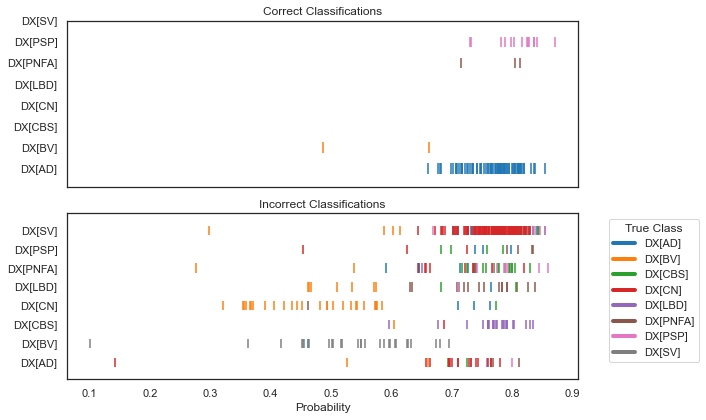

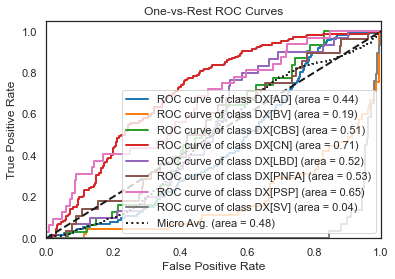

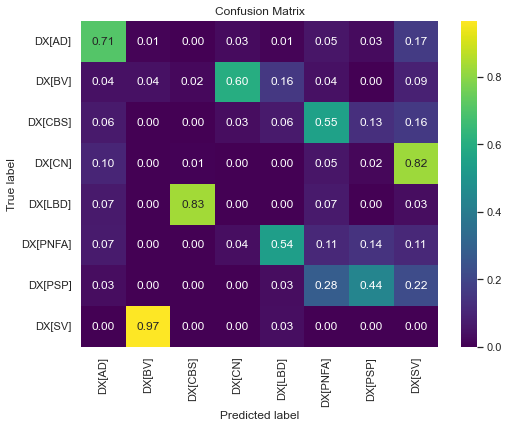

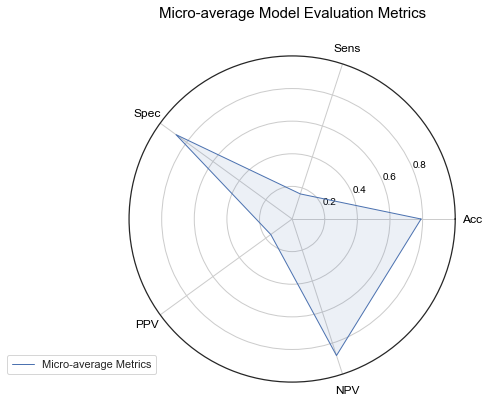

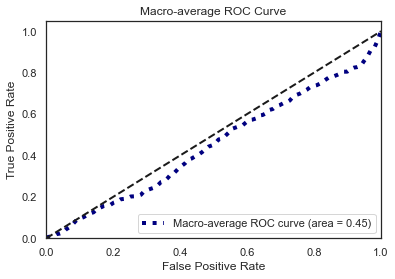

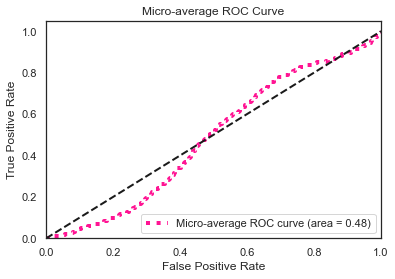

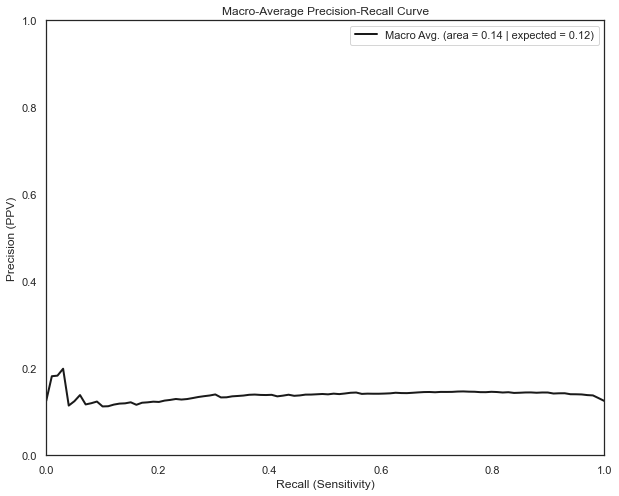

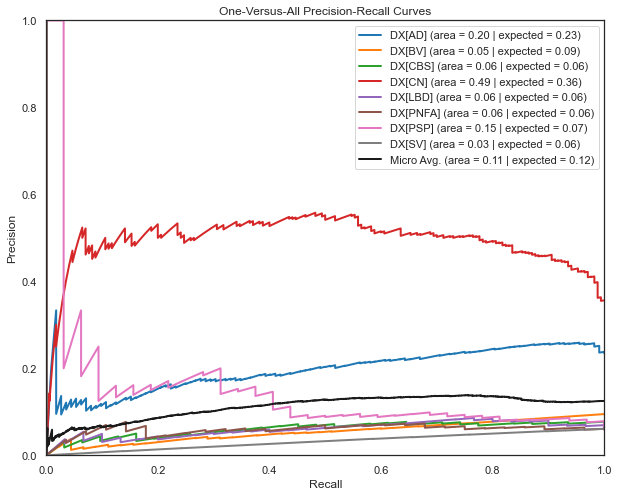

In [171]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=design_matrix, observation_df=outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir+'/train_results')
evaluator.run()

Visuialize OVR CIs

Done  DX[AD]
Done  DX[BV]
Done  DX[CBS]
Done  DX[CN]
Done  DX[LBD]
Done  DX[PNFA]
Done  DX[PSP]
Done  DX[SV]


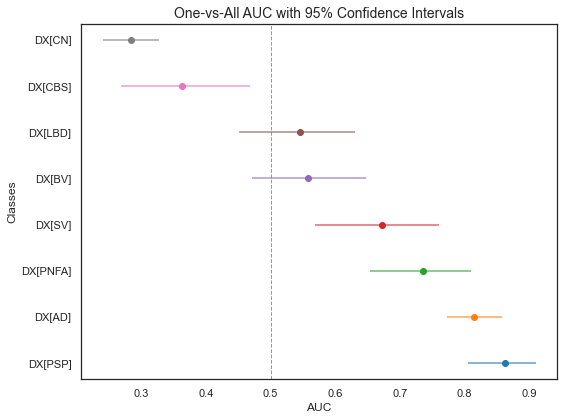

In [154]:
df, bootstrap  = evaluator.bootstrap_ovr_auroc(raw_observations=evaluator.raw_observations, raw_predictions=evaluator.raw_predictions, outcome_matrix_cols=evaluator.outcome_matrix.columns)
ComprehensiveMulticlassROC.plot_ovr_auc_with_ci(df, out_dir=out_dir+'/train_auc_per_diagnosis')

ADVANCED
- code specific manual thresholds to intervene upon classifications

Step 1: relate integer (index) to class

In [76]:
# evaluator.relate_index_to_class()

Step 2: in a dictionary of the indices (corresponding to class), key in the lambda function to edit the probability. 
- Code from left to right, giving priority to each method. 
- Example:
```
>thresholds = {
>            0: lambda probs: 0 if probs[0] > 0.5 else (1 if probs[0] > 0.25 else 2),  # Adjust class_0 predictions
>            1: lambda probs: None,  # No threshold adjustment for class_1
>            2: lambda probs: None   # No threshold adjustment for class_2
>        }
```

In [77]:
# thresholds = {
#     0: lambda prob: 0,  # Always keep class 0
#     1: lambda prob: 1,  # Always keep class 1
#     2: lambda prob: 2 if prob[2] > 0.5 else (1 if prob[1] > 0.3 else 0)  # Conditional adjustment for class 2
# }


Step 3: Check the effect

In [78]:
# from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
# evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=thresholds, out_dir=out_dir)
# evaluator.run()

Step 4: YOU MUST LOOCV AND VALIDATE IN OUT-OF-SAMPLE DATA.
- add thresholds as an argument to any further calls to ComprehensiveMulticlassROC

Bootstrap the Micro Average AUC

In [79]:
design_matrix

,AD,SV,LBD,BV,PNFA,CBS,PSP,CN
0,0.792234,0.637130,0.770520,0.711657,0.741938,0.741759,0.751960,0.778796
1,0.698004,0.541441,0.697240,0.664413,0.627885,0.639614,0.655714,0.681190
2,0.710199,0.464189,0.721739,0.734623,0.733545,0.686729,0.699635,0.698206
3,0.742413,0.586996,0.689886,0.646002,0.718025,0.714775,0.692431,0.712252
4,0.787148,0.624036,0.770895,0.713148,0.747336,0.754323,0.751406,0.788459
...,...,...,...,...,...,...,...,...
472,0.820439,0.612870,0.817282,0.770483,0.803333,0.810117,0.813656,0.835698
473,0.801270,0.604334,0.753413,0.697122,0.760507,0.799688,0.779230,0.786925
474,0.828650,0.600227,0.836563,0.776609,0.810572,0.835810,0.830756,0.857019
475,0.820463,0.619128,0.834255,0.801400,0.808762,0.823134,0.830933,0.845885


In [172]:
import matplotlib
from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend

mean_auc, lower_ci, upper_ci = bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

100%|██████████| 1000/1000 [00:29<00:00, 33.78it/s]

Mean AUC: 0.9604468249721916, 95% CI: (0.9507309429316074, 0.9721645843575356)


Permutation Test Two AUCs

In [ ]:
data_df.columns

In [ ]:
# f1 = "Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF"
# f2 = "Diagnosis ~ CerebellumGM + ParietalGM + MTLGM + OccipitalGM + FrontalGM + temp_ins_gm + SubcortexGM"

In [ ]:
# import matplotlib
# matplotlib.use('Agg')  # Use a non-interactive backend
# from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
# obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(data_df, formula1=f1, 
#                                                                   formula2=f2,
#                                                                   cal_palm=cal_palm, n_iterations=1000)
# print(f'Observde AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

# 06 - Visualize the Regression as a Forest Plot
- This will probably look poor if you ran a regression without standardizing your data. 

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import MultinomialForestPlot

multinomial_forest = MultinomialForestPlot(model=results, sig_digits=2, out_dir=out_dir+'/forest_plots', table=False)
multinomial_forest.run()

# 07 - Generate Partial Dependence Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialDependencePlot
pdp = PartialDependencePlot(formula=formula, data_df=data_df, model=results, design_matrix=design_matrix, outcomes_df=outcome_matrix, data_range=[-1,1], out_dir=out_dir+'/partial_dep_plots', marginal_method='mean', debug=False)
pdp.run()

# 08 - Visualize the Partial Regression Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialRegressionPlot
partial_plot = PartialRegressionPlot(model=results, design_matrix=design_matrix, out_dir=out_dir+'/partial_regression_plot', palette=None)
partial_plot = partial_plot.run()

# 09 - LOOCV

477it [00:06, 74.71it/s]


Taking maximum probability as prediction.
There are 112.0 observations for DX[AD]
There are 45.0 observations for DX[BV]
There are 31.0 observations for DX[CBS]
There are 170.0 observations for DX[CN]
There are 30.0 observations for DX[LBD]
There are 28.0 observations for DX[PNFA]
There are 32.0 observations for DX[PSP]
There are 29.0 observations for DX[SV]
Optimal Thresholds: 
 {0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf}


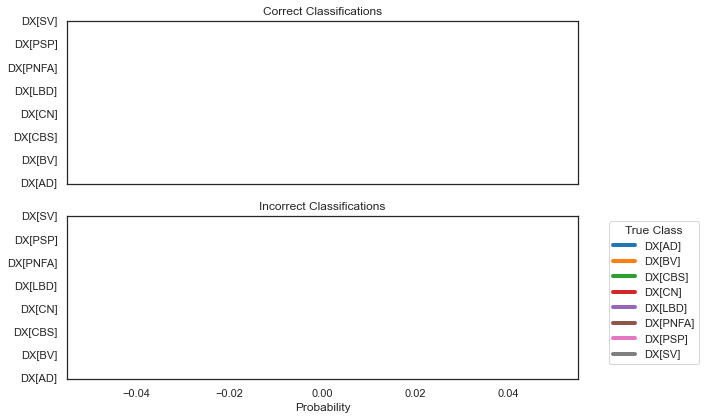

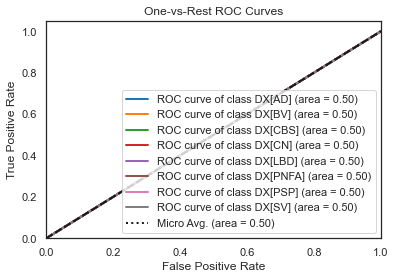

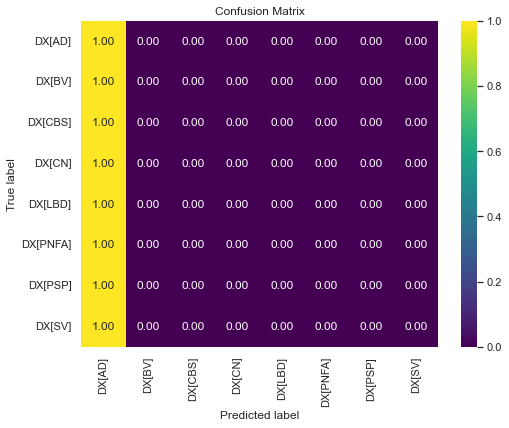

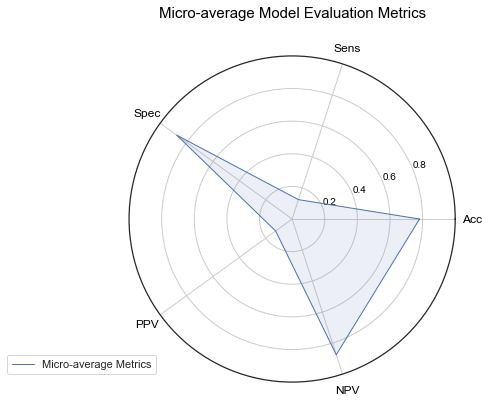

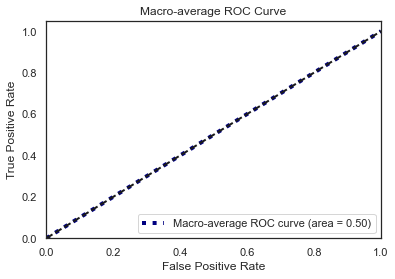

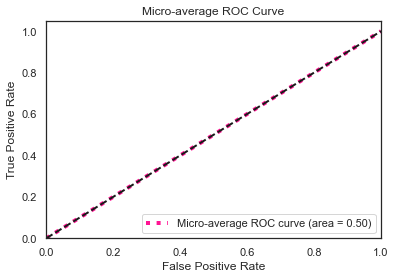

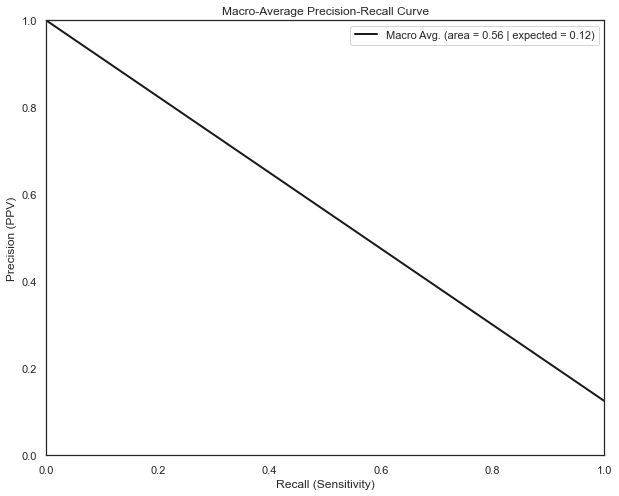

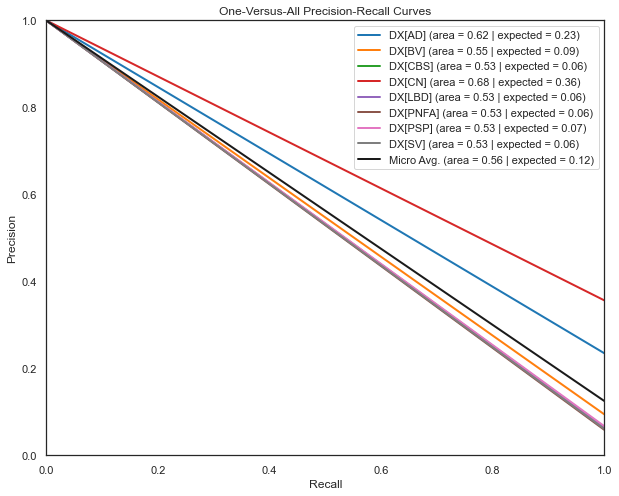

In [98]:
import pandas as pd
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
y_true, y_pred, test_prob = LogisticRegression.run_loocv(outcome_matrix, design_matrix)
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=pd.DataFrame(design_matrix, columns=outcome_matrix.columns), observation_df=outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir+'/loocv_results')
loocv_evaluator.run()

Done  DX[AD]
Done  DX[BV]
Done  DX[CBS]
Done  DX[CN]
Done  DX[LBD]
Done  DX[PNFA]
Done  DX[PSP]
Done  DX[SV]


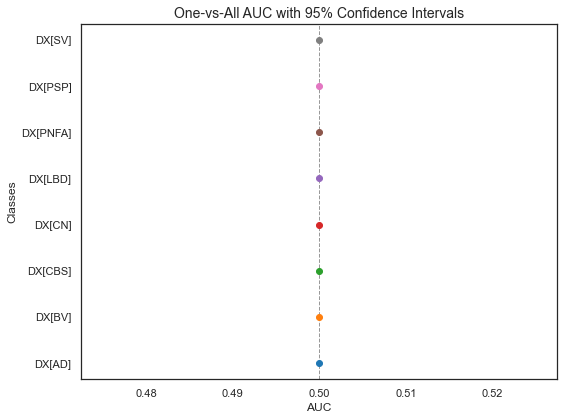

In [99]:
df, bootstrap  = loocv_evaluator.bootstrap_ovr_auroc(raw_observations=loocv_evaluator.raw_observations, raw_predictions=loocv_evaluator.raw_predictions, outcome_matrix_cols=loocv_evaluator.outcome_matrix.columns)
ComprehensiveMulticlassROC.plot_ovr_auc_with_ci(df, out_dir=out_dir+'/loocv_auc_per_diagnosis')

# 10 - Predict Unseen Data

In [ ]:
new_csv_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_6/differential_diagnoses_test_jan10.csv'

Optional - Get New Data

In [ ]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# # Instantiate the PalmPrepararation class
new_palm = CalvinStatsmodelsPalm(input_csv_path=new_csv_path, output_dir=out_dir+'/test_results', sheet=sheet)
# Call the process_nifti_paths method
other_df = new_palm.read_and_display_data()
other_df

In [ ]:
# formula

In [ ]:
# column_renaming_map = {
#                        'Mesial_Temporal': 'mesial_temporal_eh', 
#                        'parietal': 'parietal_eh', 
#                        'frontal': 'frontal_eh',
#                        'temporal': 'temporal_eh', 
#                        'ventricle':'ventricle_eh',
#                        'occipital': 'occipital_eh'}

In [ ]:
# other_df.rename(columns=column_renaming_map, inplace=True)

Prepare Data

In [ ]:
# Define the design matrix
# subset_df = other_df.groupby('DIAGNOSIS_BL').apply(lambda x: x.sample(min(len(x), 200))).reset_index(drop=True)
import pandas as pd
other_outcome_matrix, other_design_matrix = cal_palm.define_design_matrix(formula, other_df)

# Ensure both matrices have the same columns
if len(other_outcome_matrix.columns) != len(outcome_matrix.columns):
    # Create a zero-filled DataFrame with the same columns as outcome_matrix
    zero_df = pd.DataFrame(0, index=other_outcome_matrix.index, columns=outcome_matrix.columns)
    
    # Fill zero_df with values from other_outcome_matrix where columns exist
    common_columns = other_outcome_matrix.columns.intersection(outcome_matrix.columns)
    zero_df.loc[:, common_columns] = other_outcome_matrix.loc[:, common_columns]
    
    other_outcome_matrix = zero_df

other_design_matrix


Predict

Evaluate

In [ ]:
formula

In [ ]:
# thresholds = {
#     0: lambda prob: 0 if prob < 0.33 else 1,
#     1: lambda prob: 1 if prob > 0.33 else 0
# }

In [ ]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results.predict(other_design_matrix), observation_df=other_outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir+'/test_results')
loocv_evaluator.run() 

In [ ]:
# results.predict(other_design_matrix)
loocv_evaluator.predictions_df.to_csv(out_dir+'/test_results/predicted_probabilities.csv')

Get One Vs. All Confidence Intervals on AUC

In [ ]:
df, bootstrap = ComprehensiveMulticlassROC.bootstrap_ovr_auroc(raw_observations=loocv_evaluator.raw_observations, raw_predictions=loocv_evaluator.raw_predictions, outcome_matrix_cols=loocv_evaluator.outcome_matrix.columns)
ComprehensiveMulticlassROC.plot_ovr_auc_with_ci(df, out_dir=out_dir+'/test_auc_per_diagnosis')

In [ ]:
display(df)

Get Confidence Intervals on Sensitivity, Specificity, NPV, PPV, and Accuracy for Each Class

In [ ]:
out_dir

In [ ]:
from calvin_utils.statistical_utils.classification_statistics import calculate_youden_and_metrics, save_dfs
dfs, youden_dict = calculate_youden_and_metrics(raw_observations=loocv_evaluator.raw_observations, 
                                                raw_predictions=loocv_evaluator.raw_predictions, 
                                                outcome_matrix_cols=loocv_evaluator.outcome_matrix.columns,
                                                out_dir=out_dir+'/metrics_per_diagnosis')
save_dfs(dfs, out_dir=out_dir+'/metrics_per_diagnosis')

In [ ]:
dfs['DX[AD]']

In [ ]:
ComprehensiveMulticlassROC.generate_all_plots(dfs, out_dir=out_dir+'/metrics_per_diagnosis')

Get Overall Micro Average AUC

In [ ]:
loocv_evaluator.get_micro_auc()

In [ ]:

###----- Functionally Programmed Functions for Evaluation Using Above Classes -----##
'''
Hanging imports to facilitate easy transplant of code.
'''
import numpy as np
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
import os
from contextlib import redirect_stdout, redirect_stderr
from tqdm import tqdm

def resample_df(data_df):
    n_samples = data_df.shape[0]
    # Shuffle the indices
    shuffled_indices = np.random.permutation(n_samples)
    # Reorder the DataFrame based on the shuffled indices but keep the original index
    shuffled_df = data_df.iloc[shuffled_indices].reset_index(drop=True).set_index(data_df.index)
    return shuffled_df

def permute_auc_difference(data_df, formula1, formula2, cal_palm, n_iterations=1000):
    auc_diffs = []
    for i in tqdm(range(n_iterations)):
        try:
            with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
                # Define design matrices and outcome matrices for both formulas
                outcome_matrix, design_matrix1 = cal_palm.define_design_matrix(formula1, data_df)
                _, design_matrix2 = cal_palm.define_design_matrix(formula2, data_df)
                
                # Permute the outcomes
                if i == 0:
                    resampled_df = outcome_matrix
                else:
                    resampled_df = resample_df(outcome_matrix)

                # Fit the logistic regression model for the first formula
                logreg1 = LogisticRegression(resampled_df, design_matrix1)
                results1 = logreg1.run()

                # Fit the logistic regression model for the second formula
                logreg2 = LogisticRegression(resampled_df, design_matrix2)
                results2 = logreg2.run()

                # Evaluate the models
                evaluator1 = ComprehensiveMulticlassROC(fitted_model=results1, observation_df=resampled_df, normalization='true', thresholds=None, out_dir=None)
                micro_auc1 = evaluator1.get_micro_auc()

                evaluator2 = ComprehensiveMulticlassROC(fitted_model=results2, observation_df=resampled_df, normalization='true', thresholds=None, out_dir=None)
                micro_auc2 = evaluator2.get_micro_auc()

                # Store the difference in micro-average AUCs
                if i == 0:
                    obs_diff = micro_auc1 - micro_auc2
                    print(f"F1: {micro_auc1} | F2: {micro_auc2}")
                else:
                    auc_diffs.append(micro_auc1 - micro_auc2)
            
        except Exception as e:
            print(e)
            continue
    # Calculate p-value based on the distribution of differences
    auc_diffs = np.array(auc_diffs)
    p_value = np.mean(auc_diffs >= obs_diff)

    # Calculate confidence intervals for the difference
    lower_ci = np.percentile(auc_diffs, 2.5)
    upper_ci = np.percentile(auc_diffs, 97.5)
    
    return obs_diff, lower_ci, upper_ci, p_value

def bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000, model=None):
    auc_scores = []
    n_samples = outcome_matrix.shape[0]
    
    for i in tqdm(range(n_iterations)):
        # Suppress both stdout and stderr
        try:
            with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
                # Generate a bootstrap sample
                resample_idx = np.random.choice(n_samples, size=n_samples, replace=True)
                outcome_matrix_resampled = outcome_matrix.iloc[resample_idx]
                design_matrix_resampled = design_matrix.iloc[resample_idx]

                # Fit the logistic regression model
                if model is None:
                    logreg = LogisticRegression(outcome_matrix_resampled, design_matrix_resampled)
                    results = logreg.run()
                    test = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix_resampled, normalization='true', thresholds=None, out_dir=None)
                else:
                    results = model.predict(design_matrix_resampled)
                    test = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results, observation_df=outcome_matrix_resampled, normalization='true', thresholds=None, out_dir=None)
                # Evaluate the model
                micro_auc = test.get_micro_auc()
                auc_scores.append(micro_auc)
        except:
            continue
    # Calculate confidence intervals
    lower_ci = np.percentile(auc_scores, 2.5)
    upper_ci = np.percentile(auc_scores, 97.5)    
    return np.mean(auc_scores), lower_ci, upper_ci, auc_scores


Bootstrap the Micro Average AUC

In [ ]:
import matplotlib
# from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend
mean_auc, lower_ci, upper_ci, auc_dist = bootstrap_auc(other_outcome_matrix, other_design_matrix, n_iterations=1000, model=results)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

In [ ]:
import pandas as pd
auc_df = pd.DataFrame({'val':auc_dist})
auc_df.to_csv('/path/to/df.csv')

In [ ]:
auc_df = pd.read_csv('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability/50fit_150pred/auc_dist.csv')

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

def compare_bootstrapped_means(distribution1, distribution2):
    """
    Compares two bootstrapped distributions using a two-sample t-test and Mann-Whitney U test.
    
    Parameters:
    - distribution1 (list or array): Bootstrapped distribution of group 1.
    - distribution2 (list or array): Bootstrapped distribution of group 2.
    
    Returns:
    - t_stat (float): t-statistic from the two-sample t-test.
    - t_p_value (float): p-value from the two-sample t-test.
    - u_stat (float): U-statistic from the Mann-Whitney U test.
    - u_p_value (float): p-value from the Mann-Whitney U test.
    """
    # Perform a two-sample t-test to compare means
    t_stat, t_p_value = ttest_ind(distribution1, distribution2)
    
    # Perform a Mann-Whitney U test to compare distributions
    u_stat, u_p_value = mannwhitneyu(distribution1, distribution2)

    return t_stat, t_p_value, u_stat, u_p_value

# Compare the distributions
t_stat, t_p_value, u_stat, u_p_value = compare_bootstrapped_means(auc_df['CSF AUCs'], auc_df['CTh AUCs'])

print(f"Two-sample t-test: t-stat = {t_stat:.4f}, p-value = {t_p_value:.4f}")
print(f"Mann-Whitney U test: U-stat = {u_stat:.4f}, p-value = {u_p_value:.4f}")


Plot Bootstraps

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_custom_bootstrap_auc(df):
    """
    Plots the mean and error bars of AUCs for each column in the DataFrame using Seaborn and Matplotlib,
    styled similarly to the reference plot.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing bootstrapped AUC distributions. 
                         Each column represents a different group.
    """
    # Initialize lists to store plotting data
    means = []
    lower_errors = []
    upper_errors = []
    y_labels = []

    # Calculate mean and confidence intervals for each column in the DataFrame, ignoring NaNs
    for column in df.columns:
        bootstrapped_values = df[column].dropna()  # Remove NaN values
        if len(bootstrapped_values) > 0:
            mean_value = np.mean(bootstrapped_values)
            lower_ci = np.percentile(bootstrapped_values, 2.5)
            upper_ci = np.percentile(bootstrapped_values, 97.5)
            
            means.append(mean_value)
            lower_errors.append(mean_value - lower_ci)
            upper_errors.append(upper_ci - mean_value)
            y_labels.append(column)

    # Create a horizontal scatter plot with error bars
    plt.figure(figsize=(6, len(means) * 1.2))  # Adjust height based on number of groups
    sns.set(style="whitegrid")
    
    # Assign colors from a color palette
    palette = sns.color_palette("tab10", len(means))

    # Plot the means as points with error bars
    for i, (mean, lower_err, upper_err, label) in enumerate(zip(means, lower_errors, upper_errors, y_labels)):
        plt.errorbar(x=mean, y=i, xerr=[[lower_err], [upper_err]], fmt='o', color=palette[i], capsize=5, markersize=10)
    
    # Customize y-ticks to match labels
    plt.yticks(range(len(y_labels)), y_labels)
    
    # Labels and title
    plt.xlabel('AUC')
    plt.ylabel('CAD Product')
    plt.title('Mean AUC with 95% CI for CAD Products')

    # Customize the grid and layout
    plt.grid(False)
    plt.xlim(0.4, 1.0)  # Set x-axis limits for AUC

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.savefig(out_dir + '/95ci.svg')

plot_custom_bootstrap_auc(auc_df)

Permutation Test Two AUCs

In [ ]:
other_df.columns

In [ ]:
f1 = "Diagnosis ~ CSF_Frontal + CSF_Temporal + CSF_Parietal + CSF_Occipital + CSF_MTL + CSF_Cerebellum + CSF_Subcortex"
f2 = "Diagnosis ~ GM_Frontal + GM_Temporal + GM_Parietal + GM_Occipital + GM_MTL + GM_Cerebellum + GM_Subcortex"

In [ ]:
# from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(other_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observed AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')